Loading aerodynamic buildup data...
Loading buildup data...
[-57.672722    11.15513163  33.3167203    1.79578314]
1.0306829215596678e-06


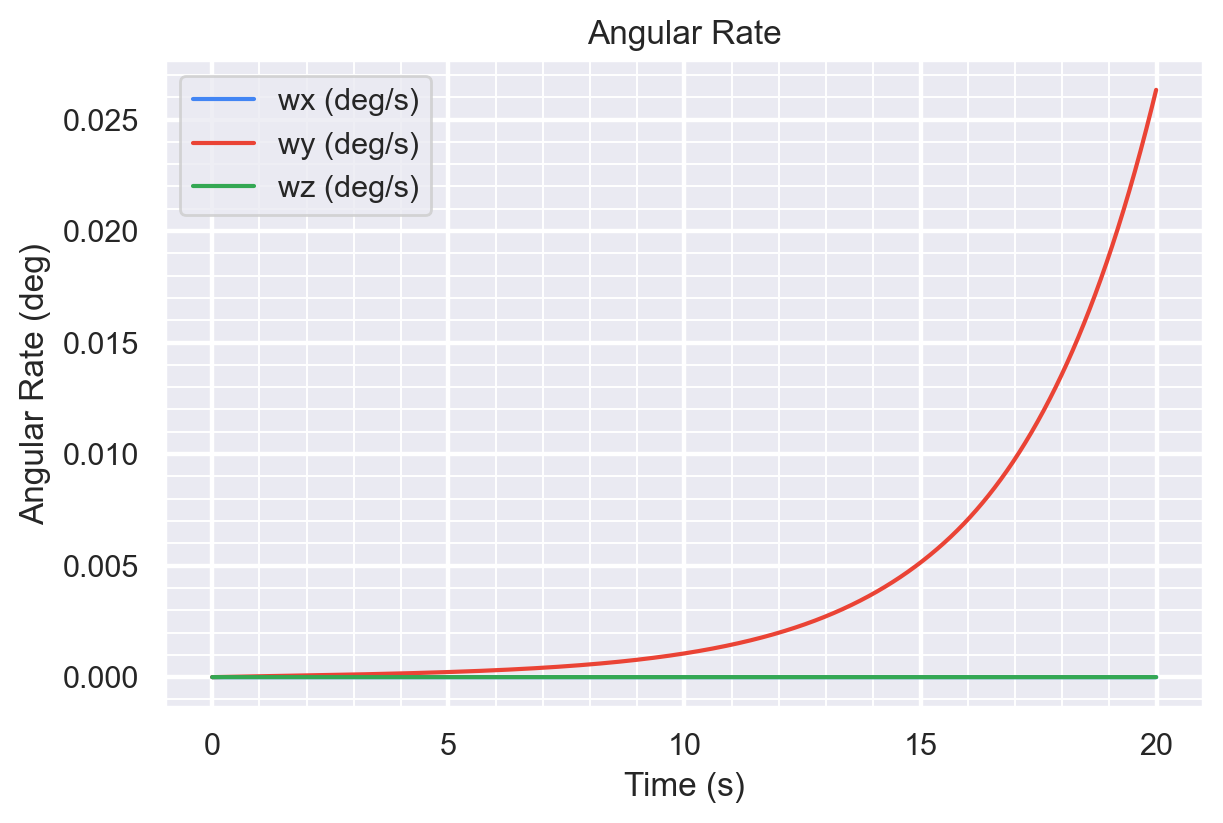

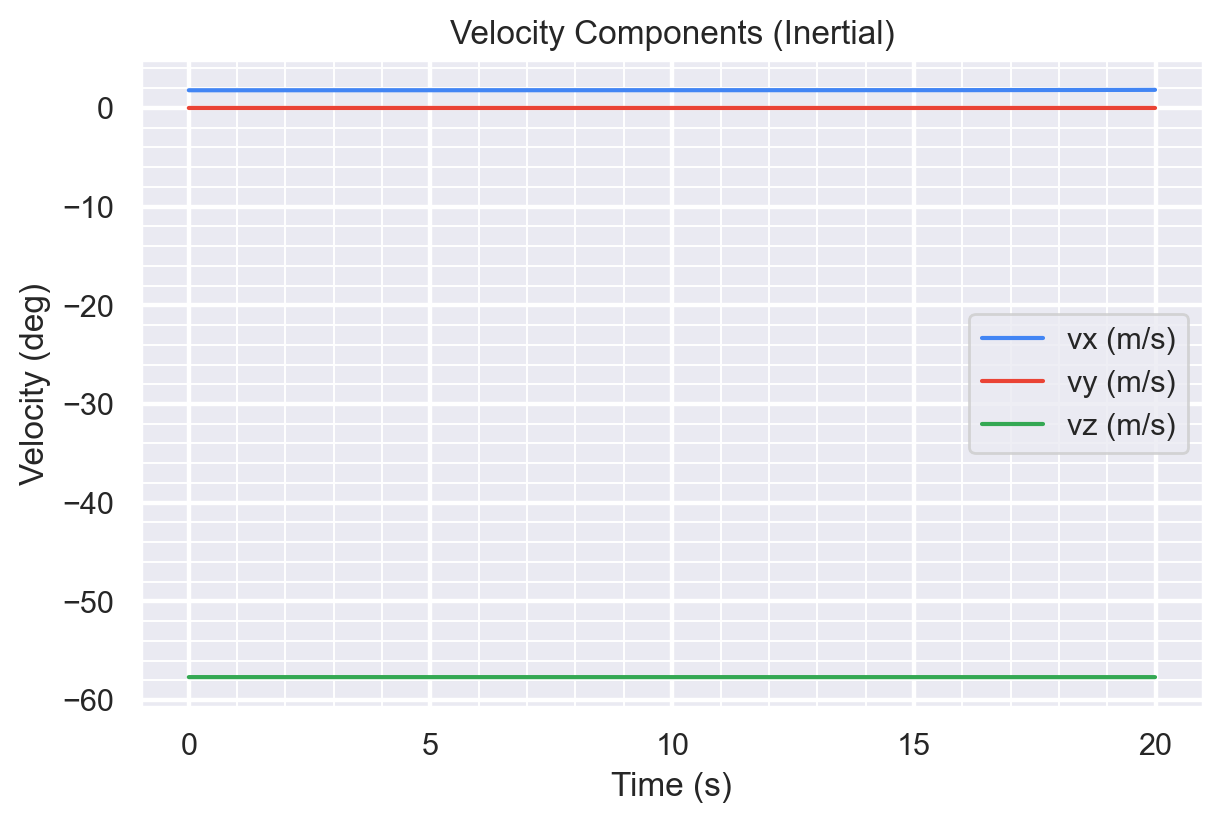

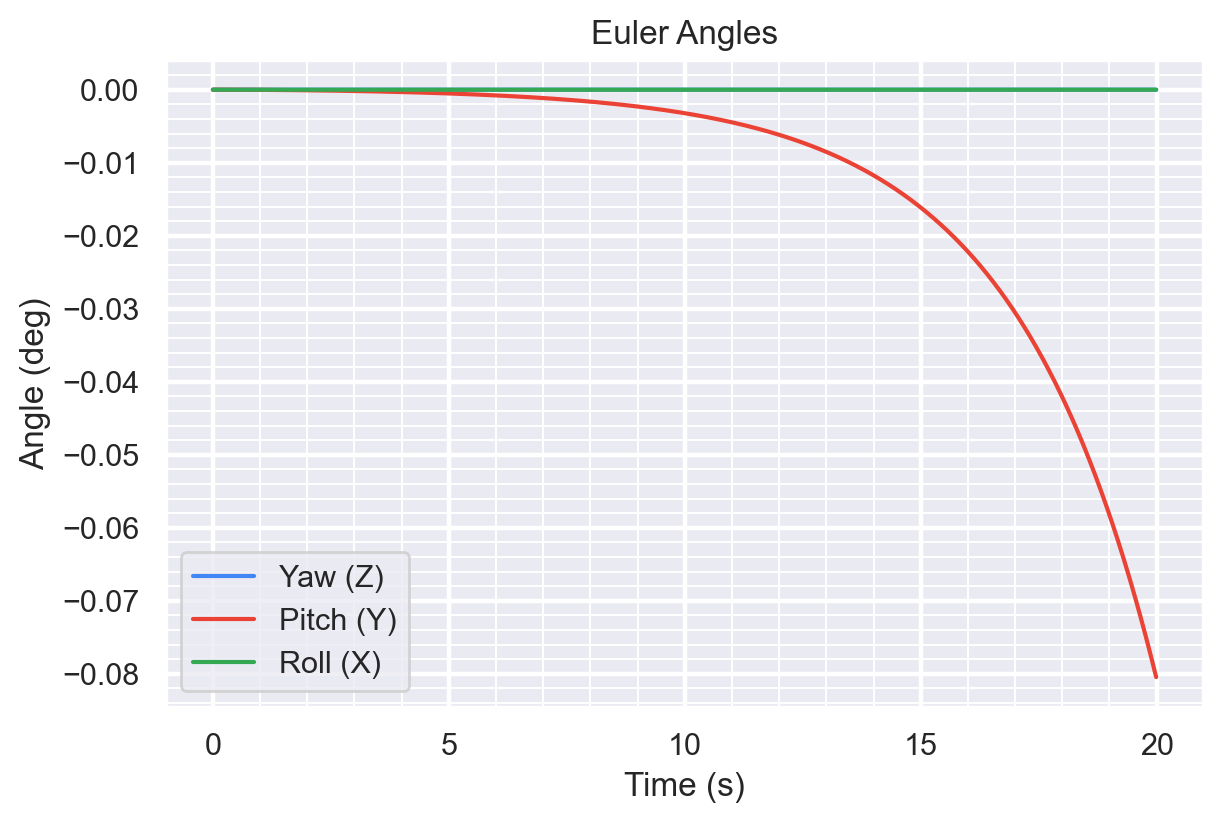

In [24]:

from examples.Starship.starship import Starship

from FlightCanvas.Flight.flight import Flight
from FlightCanvas.analysis.anlaysis import Analysis
from FlightCanvas.analysis.anlaysis import Log
from examples.Starship.starship_trimpoints import Trimpoints

import pyvista as pv
pv.set_jupyter_backend('trame')

starship = Starship()

state_names = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'q0', 'q1', 'q2', 'q3', 'wx', 'wy', 'wz']
deflection_names = ['g0', 'f1', 'f2', 'f3', 'f4']
maxSteps = 1000
log = Log(state_names, deflection_names, maxSteps)

dt = 0.01
tf = 20
flight = Flight(starship.vehicle, tf, dt=dt)

trim = Trimpoints(starship.vehicle.vehicle_dynamics)
trim.calculate_ROM()
#inital_state, inital_control, _ = trim.find_trimpoint()

#pos_0 = np.array([0, 0, 1000])  # Initial position
#vel_0 = np.array([0, 0, -1])  # Initial velocity
#quat_0 = utils.euler_to_quat((0, 10, 0))
#omega_0 = np.array([0, 0, 0])  # Initial angular velocity
#inital_state = np.concatenate((pos_0, vel_0, quat_0, omega_0))
#inital_control = np.array([0, 0, 0, 0, 0])

flight.run_sim(inital_state, inital_control, log)

pv.set_jupyter_backend('static')

analysis = Analysis(log)
analysis.generate_angular_velocity_plot()
analysis.generate_velocity_plot()
analysis.generate_euler_angle_plot()



